In [15]:
import numpy as np

chessboard = np.zeros((2,2), dtype=int)

chessboard[0,0] = 1

for i in range(2):
    for j in range(2):
        if i==0 and j==0:
            continue
        elif j==0:
            chessboard[i,j] = chessboard[i-1, 1] * 2
        else:
            chessboard[i, j] = chessboard[i, j-1] * 2

print("2×2 Chessboard with wheat count:")
print(chessboard)

2×2 Chessboard with wheat count:
[[1 2]
 [4 8]]


In [19]:
import numpy as np

def wheat_chessboard(n,m):
    chessboard = np.zeros((n,m), dtype=np.uint64)
    chessboard[0,0] = 1

    for i in range(n):
        for j in range(m):
            if i==0 and j==0:
                continue
            elif j==0:
                chessboard[i,j] = chessboard[i-1, m-1] * 2
            else:
                chessboard[i, j] = chessboard[i, j-1] * 2
    return chessboard

# Testing with an 8×8 board
board_8x8 = wheat_chessboard(8, 8)
print(board_8x8)

[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     140737488355328

Total number of wheat grains: 18446744073709551615


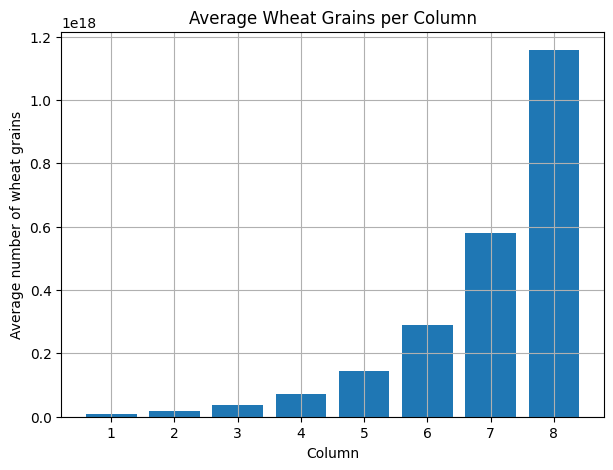

In [31]:
import matplotlib.pyplot as plt

# Generate 8×8 chessboard
board_8x8 = wheat_chessboard(8, 8)

# Calculate total sum of wheat grains
total_wheat = np.sum(board_8x8)
print(f"Total number of wheat grains: {total_wheat}")

# Calculate column-wise mean
column_means = np.mean(board_8x8, axis=0)

# Plot the bar chart
plt.figure(figsize=(7, 5))
plt.xlabel("Column")
plt.ylabel("Average number of wheat grains")
plt.title("Average Wheat Grains per Column")
plt.bar(np.arange(1, 9), column_means)
plt.grid()
plt.show()

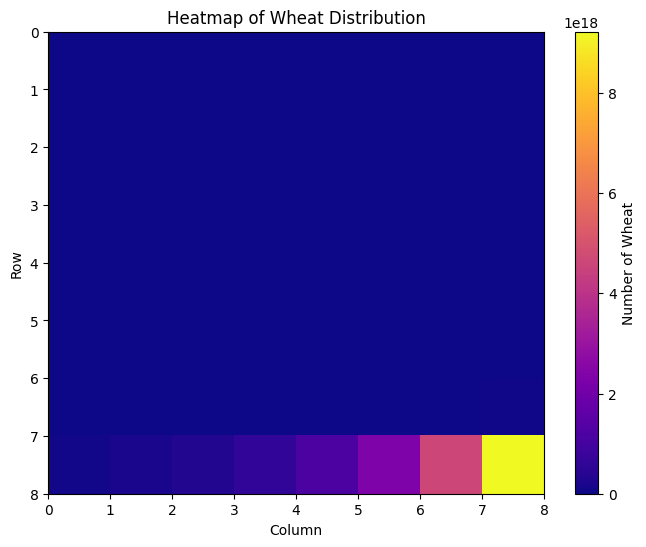

In [33]:
import matplotlib.pyplot as plt


board_8x8 = wheat_chessboard(8, 8)

# Criar Heatmap
plt.figure(figsize=(8, 6))
plt.xlabel("Column")
plt.ylabel("Row")
plt.title("Heatmap of Wheat Distribution")
plt.pcolor(board_8x8, cmap="plasma")
plt.colorbar(label="Number of Wheat")
plt.gca().invert_yaxis()
plt.show()

In [35]:
chessboard = wheat_chessboard(8,8)
first_half_sum = np.sum(chessboard[:4, :])
second_half_sum = np.sum(chessboard[4:, :])

ratio = second_half_sum / first_half_sum

print(f"Sum of the first half: {first_half_sum}")
print(f"Sum of the second half: {second_half_sum}")
print(f"The second half is {ratio:.2f} times bigger than the first.")

Sum of the first half: 4294967295
Sum of the second half: 18446744069414584320
The second half is 4294967296.00 times bigger than the first.


In [39]:
import numpy as np

def create_chessboard_with_append(n=8, m=8):
    board = np.array([1], dtype=np.uint64)
    for _ in range(n * m - 1):
        board = np.append(board, board[-1] * 2)
    return board.reshape(n, m)

chessboard = create_chessboard_with_append()
print(chessboard)


[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     140737488355328

In [44]:
%%timeit
create_chessboard_with_append()


207 µs ± 22.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [45]:
%%timeit
wheat_chessboard(8,8)

23.5 µs ± 1.28 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [47]:
%%timeit
def method_broadcast(n=8, m=8):
    indices = np.arange(n * m).reshape(n, m)
    return 2 ** indices

board_broadcast = method_broadcast()


2.05 µs ± 62.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
